In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT','NFLX','TSLA', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = pd.to_datetime('now').strftime("%Y-%m-%d")

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [4]:
close = panel_data['Close']
panel_data.tail()

Attributes        High                                                   \
Symbols           AAPL        MSFT        NFLX        TSLA        ^GSPC   
Date                                                                      
2019-06-27  201.570007  134.710007  370.850006  222.899994  2929.300049   
2019-06-28  199.500000  134.600006  371.540009  225.169998  2943.979980   
2019-07-01  204.490005  136.699997  376.660004  233.100006  2977.929932   
2019-07-02  203.130005  136.589996  376.000000  229.149994  2973.209961   
2019-07-03  204.440002  137.740005  381.989990  241.570007  2995.840088   

Attributes         Low                                                   \
Symbols           AAPL        MSFT        NFLX        TSLA        ^GSPC   
Date                                                                      
2019-06-27  199.570007  133.509995  363.200012  217.350006  2918.570068   
2019-06-28  197.050003  133.160004  364.869995  220.800003  2929.050049   
2019-07-01  200.649994  134.970001  372.000000  226.279999  2952.219971   
2019-07-02  201.360001  135.339996  370.309998  222.220001  2955.919922   
2019-07-03  202.690002  136.289993  375.839996  234.509995  2977.959961   

Attributes     ...           Volume                                     \
Symbols        ...             AAPL        MSFT       NFLX        TSLA   
Date           ...                                                       
2019-06-27     ...       20899700.0  16557500.0  4138600.0   6339700.0   
2019-06-28     ...       31110600.0  30043000.0  4592700.0   6851400.0   
2019-07-01     ...       27253000.0  22613500.0  4992600.0   8213400.0   
2019-07-02     ...       16935200.0  15237800.0  3625000.0   9259000.0   
2019-07-03     ...       11362000.0  13629300.0  3799000.0  14201100.0   

Attributes                 Adj Close                                      \
Symbols            ^GSPC        AAPL        MSFT        NFLX        TSLA   
Date                                                                       
2019-06-27  3.122920e+09  199.740005  134.149994  370.019989  222.839996   
2019-06-28  5.420700e+09  197.919998  133.960007  367.320007  223.460007   
2019-07-01  3.513270e+09  201.550003  135.679993  374.600006  227.169998   
2019-07-02  3.206840e+09  202.729996  136.580002  375.429993  224.550003   
2019-07-03  1.963720e+09  204.410004  137.460007  381.720001  234.899994   

Attributes               
Symbols           ^GSPC  
Date                     
2019-06-27  2924.919922  
2019-06-28  2941.760010  
2019-07-01  2964.330078  
2019-07-02  2973.010010  
2019-07-03  2995.820068  

[5 rows x 30 columns]

In [5]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close.head()

Symbols,AAPL,MSFT,NFLX,TSLA,^GSPC
2010-01-01,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.572857,30.950001,7.640000,NaN,1132.989990
2010-01-05,30.625713,30.959999,7.358572,NaN,1136.520020
2010-01-06,30.138571,30.770000,7.617143,NaN,1137.140015
2010-01-07,30.082857,30.450001,7.485714,NaN,1141.689941


In [6]:
close = close.fillna(method='ffill')
close.head()

Symbols,AAPL,MSFT,NFLX,TSLA,^GSPC
2010-01-01,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.572857,30.950001,7.640000,NaN,1132.989990
2010-01-05,30.625713,30.959999,7.358572,NaN,1136.520020
2010-01-06,30.138571,30.770000,7.617143,NaN,1137.140015
2010-01-07,30.082857,30.450001,7.485714,NaN,1141.689941


In [7]:
close.describe()

Symbols,AAPL,MSFT,NFLX,TSLA,^GSPC
count,2480.000000,2480.000000,2480.000000,2354.000000,2480.000000
mean,103.948729,51.888391,105.939752,177.684656,1908.112584
std,49.353448,28.302010,109.880177,114.272114,550.475057
min,27.435715,23.010000,7.018571,15.800000,1022.580017
25%,63.271071,29.222500,25.683215,33.680000,1365.637543
50%,96.650002,43.070000,61.872858,206.964996,1951.200012
75%,135.720001,64.402502,141.864998,262.077492,2339.024963
max,232.070007,137.779999,418.970001,385.000000,2995.820068


In [8]:
## Check out the moving average for specific stock
nflx = close['NFLX']
days20_move_avg  =  nflx.rolling(window=20).mean()
days100_move_avg  =  nflx.rolling(window=100).mean()

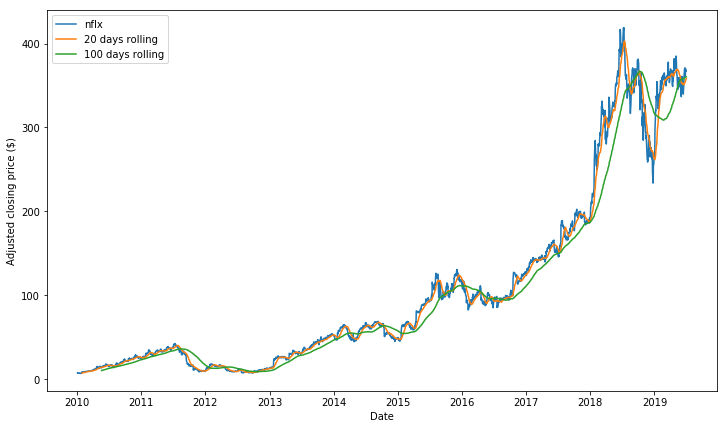

In [14]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(nflx.index, nflx, label='nflx')
ax.plot(days20_move_avg.index, days20_move_avg, label='20 days rolling')
ax.plot(days100_move_avg.index, days100_move_avg, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [9]:
panel_data.head()

def onestockdata(alldata, tick):
    high = pd.DataFrame(panel_data['High'][tick]).reset_index().rename(columns={tick:'high'})
    low  = pd.DataFrame(panel_data['Low'][tick]).reset_index().rename(columns={tick:'low'})
    opens  = pd.DataFrame(panel_data['Open'][tick]).reset_index().rename(columns={tick:'open'})
    close  = pd.DataFrame(panel_data['Close'][tick]).reset_index().rename(columns={tick:'close'})
    adjclose  = pd.DataFrame(panel_data['Adj Close'][tick]).reset_index().rename(columns={tick:'adjclose'})
    volume  = pd.DataFrame(panel_data['Volume'][tick]).reset_index().rename(columns={tick:'volume'})
    volume.head()
    indstockdtl = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(opens,close, on='Date'),low,on='Date'),high,on='Date'),adjclose,on='Date'),volume,on='Date')
    return indstockdtl



In [13]:
## Calling the fucntion to retrive the data for one stock
indstockdtl = onestockdata(panel_data,'NFLX')
df = indstockdtl.copy()
df.tail()


,Date,open,close,low,high,adjclose,volume
2386,2019-06-27,363.200012,370.019989,363.200012,370.850006,370.019989,4138600.0
2387,2019-06-28,370.260010,367.320007,364.869995,371.540009,367.320007,4592700.0
2388,2019-07-01,373.500000,374.600006,372.000000,376.660004,374.600006,4992600.0
2389,2019-07-02,374.890015,375.429993,370.309998,376.000000,375.429993,3625000.0
2390,2019-07-03,376.690002,381.720001,375.839996,381.989990,381.720001,3799000.0


In [14]:
indstockdtl.to_csv('stock.csv', sep=',', encoding='utf-8')

In [15]:
import datetime as dt
df['day'] = df['Date'].dt.strftime("%A")
df['month'] = df['Date'].dt.strftime("%B")
df['year'] = df['Date'].dt.strftime("%Y")
df['daydiff'] = (df['open'] - df['close']).apply(lambda x: 'Neg' if x>0 else 'Pos' )


tempdf = df[['Date','day','daydiff']].groupby(['day','daydiff']).count().rename(columns={'Date':'count'}).reset_index()
#tempdf.head()

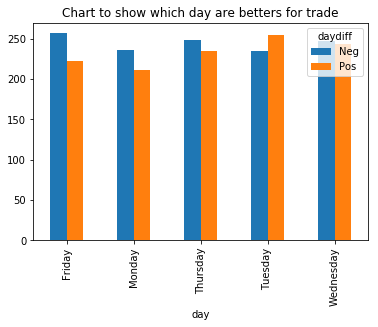

In [16]:
tempdf = tempdf.pivot(columns='daydiff', values='count', index='day').reset_index().rename(columns={'daydiff':'daynum'})
tempdf.plot(kind='bar', x='day', y=['Neg','Pos'])
plt.title('Chart to show which day are betters for trade')
plt.show()

In [17]:
## to find the longest running  positive trend
prev_daydiff =' '
rnk = 0
df['trendrank'] = ''
for index, rows in df.iterrows():
    if (rows['daydiff'] !=  prev_daydiff):
        rnk = rnk+1
        df.at[index,'trendrank'] = rnk
    else:
        df.at[index,'trendrank'] = rnk
    prev_daydiff = rows['daydiff']
    

longtrends = pd.DataFrame(df['trendrank'].value_counts()).rename(columns={'trendrank':'count'}).reset_index().rename(columns={'index':'trendrank'})


In [20]:
#### Long Positive trends 
longpostrend = df[(df.trendrank.isin(longtrends.loc[longtrends['count'] > 3,'trendrank'])) & (df['daydiff']=='Pos')]
#### Long Negative trends 
longnegtrend = df[(df.trendrank.isin(longtrends.loc[longtrends['count'] > 3,'trendrank'])) & (df['daydiff']=='Neg')]
#vartrendrank
print('postive trend count-' + str(len(longpostrend)) + '  Negative trend count-' + str(len(longnegtrend))) ## 339
## there are more negative trends than postive trends, therefore its better to get into positive trends than negative trend
longnegtrend.head()

postive trend count-282  Negative trend count-339


,Date,open,close,low,high,adjclose,volume,day,month,year,daydiff,trendrank
104,2010-06-03,15.991428,15.978572,15.701428,16.381428,15.978572,18261600.0,Thursday,June,2010,Neg,61
105,2010-06-04,15.697143,15.682858,15.362857,16.385714,15.682858,21744100.0,Friday,June,2010,Neg,61
106,2010-06-07,15.685715,15.594286,15.321428,16.177143,15.594286,26215700.0,Monday,June,2010,Neg,61
107,2010-06-08,15.867143,15.761429,15.328571,16.071428,15.761429,24122700.0,Tuesday,June,2010,Neg,61
140,2010-07-26,15.501429,14.684286,14.508572,15.570000,14.684286,32959500.0,Monday,July,2010,Neg,81


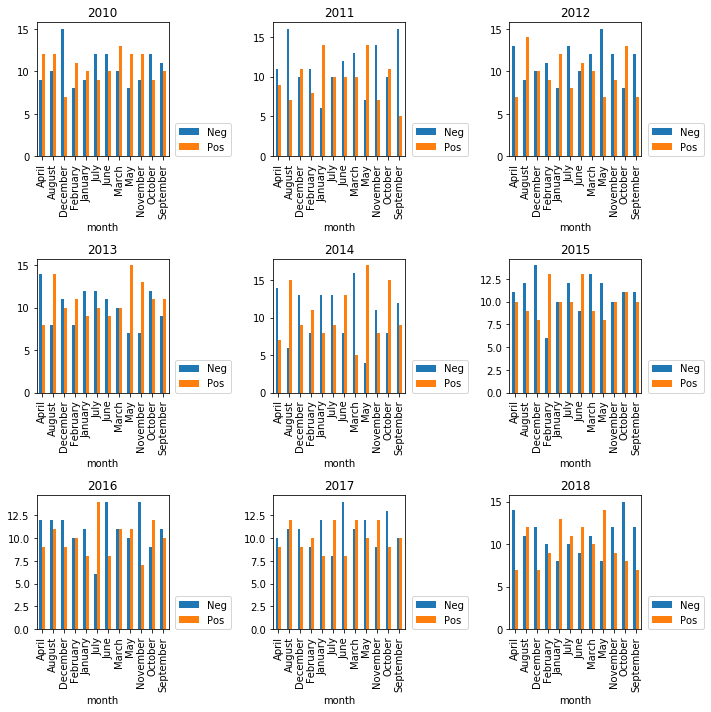

In [21]:
listofyears = df.year.unique()
fig = plt.figure(figsize=(10,10))
for year, num in zip(listofyears,range(1,len(listofyears))):
    df1= df[df['year']==year]
    ax = fig.add_subplot(3,3,num)
    tempdf = df1[['Date','month','daydiff']].groupby(['month','daydiff']).count().rename(columns={'Date':'count'}).reset_index()
    tempdf = tempdf.pivot(columns='daydiff', values='count', index='month').reset_index().rename(columns={'daydiff':'daynum'})
    tempdf.plot(kind='bar', x='month', y=['Neg','Pos'], ax=ax, legend=False, title=year)
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    
plt.tight_layout()
plt.show()

In [22]:
#calculation at month level progress
prev_month =''
for index, rows in df.iterrows():
    if (rows['month'] !=  prev_month):
        df.at[index,'monthchange'] = 1
    else:
        df.at[index,'monthchange'] = 0
   
    prev_month = rows['month']
    
month_data = df[df['monthchange']==1]
month_data = month_data[['year','month','close']]

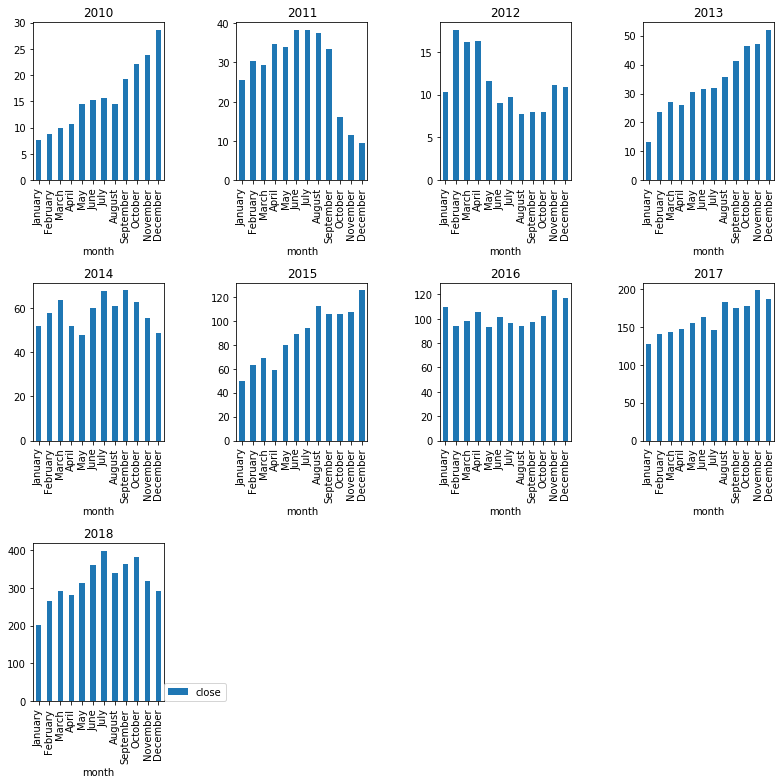

In [23]:
listofyears = df.year.unique()
fig = plt.figure(figsize=(11,11))
for year, num in zip(listofyears,range(1,len(listofyears))):
    df2= month_data[month_data['year']==year]
    ax = fig.add_subplot(3,4,num)
    df2.plot(kind='bar', x='month', y=['close'], ax=ax, legend=False, title=year)
      
ax.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)
plt.tight_layout()
plt.show()